In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import Imputer
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Features/Attributes: 
instant: record index
dteday : date
season : season (1:winter, 2:spring, 3:summer, 4:fall)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not.
weekday : day of the week.
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy                                                    
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                                 
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds                               
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                               
temp : Normalized temperature in Celsius.
atemp: Normalized feeling temperature in Celsius.
hum: Normalized humidity.
windspeed: Normalized wind speed.
casual: count of casual users.
registered: count of registered users. 
 Labels/Target: 
cnt: count of total rental bikes including both casual and registered. 
 
 As it is continuous data so i will use Linear Regression here.

# Data Exploration (exploratory data analysis or EDA)

In [3]:
#we can drop "instant" column as it is just a Serial number
df.drop(columns=["instant"],inplace=True)

In [4]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#lets check the datatypes
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
#To check the shape of the dataset
df.shape # (rows, columns)

(17379, 16)

In [7]:
#features in data
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB



According to the Infomation:
1)There is no-Null data
2)Object Type - 1
3)Float Type - 7
4)Int Type - 1

In [9]:
#Lets describe the dataset
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


mean is higher than the median, which means  data is right skewed and ouliers are present

In [10]:
# Are there any missing values?
df.isna().sum()


dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of dteday : 731
number of unique valuse of season : 4
number of unique valuse of yr : 2
number of unique valuse of mnth : 12
number of unique valuse of hr : 24
number of unique valuse of holiday : 2
number of unique valuse of weekday : 7
number of unique valuse of workingday : 2
number of unique valuse of weathersit : 4
number of unique valuse of temp : 50
number of unique valuse of atemp : 65
number of unique valuse of hum : 89
number of unique valuse of windspeed : 30
number of unique valuse of casual : 322
number of unique valuse of registered : 776
number of unique valuse of cnt : 869


In [12]:
#lets check the correlation matrix
df.corr()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


In [13]:
# Printing the mean values of different fields corresponding to the respective target.
df.groupby('mnth')[df.drop(['dteday'],axis=1).columns.values].mean()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,,
1,1.000000,0.518544,1.0,11.696991,0.049685,2.869839,0.634710,1.456963,0.237649,0.240676,0.580931,0.207551,8.426872,85.997901,94.424773
2,1.000000,0.516033,2.0,11.662192,0.035048,3.011186,0.680835,1.459359,0.300209,0.300621,0.567211,0.215961,11.158091,101.706935,112.865026
3,1.355737,0.504413,3.0,11.581806,0.000000,3.107943,0.725730,1.474542,0.390903,0.382299,0.589050,0.222517,30.172437,125.238289,155.410726
4,2.000000,0.499652,4.0,11.517049,0.033403,3.002784,0.665971,1.456507,0.470021,0.457110,0.588114,0.234323,42.311761,144.949200,187.260960
5,2.000000,0.500000,5.0,11.500000,0.032258,2.903226,0.693548,1.461694,0.594798,0.565662,0.688958,0.182989,50.594758,172.312500,222.907258
6,2.333333,0.500000,6.0,11.500000,0.000000,3.100000,0.716667,1.290972,0.684097,0.638246,0.575806,0.185420,51.323611,189.191667,240.515278
7,3.000000,0.500000,7.0,11.500000,0.032258,2.935484,0.661290,1.254032,0.755470,0.704094,0.597876,0.166059,52.524866,179.295027,231.819892
8,3.000000,0.504407,8.0,11.503729,0.000000,3.002034,0.748475,1.322712,0.708705,0.651556,0.637227,0.171468,48.840000,189.257627,238.097627
9,3.267223,0.501044,9.0,11.519833,0.033403,3.051496,0.665971,1.488518,0.616507,0.579344,0.714454,0.165856,48.937370,191.835769,240.773138


# Univarient  analysis

season           AxesSubplot(0.125,0.749828;0.227941x0.130172)
yr            AxesSubplot(0.398529,0.749828;0.227941x0.130172)
mnth          AxesSubplot(0.672059,0.749828;0.227941x0.130172)
hr               AxesSubplot(0.125,0.593621;0.227941x0.130172)
holiday       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
weekday       AxesSubplot(0.672059,0.593621;0.227941x0.130172)
workingday       AxesSubplot(0.125,0.437414;0.227941x0.130172)
weathersit    AxesSubplot(0.398529,0.437414;0.227941x0.130172)
temp          AxesSubplot(0.672059,0.437414;0.227941x0.130172)
atemp            AxesSubplot(0.125,0.281207;0.227941x0.130172)
hum           AxesSubplot(0.398529,0.281207;0.227941x0.130172)
windspeed     AxesSubplot(0.672059,0.281207;0.227941x0.130172)
casual              AxesSubplot(0.125,0.125;0.227941x0.130172)
registered       AxesSubplot(0.398529,0.125;0.227941x0.130172)
cnt              AxesSubplot(0.672059,0.125;0.227941x0.130172)
dtype: object

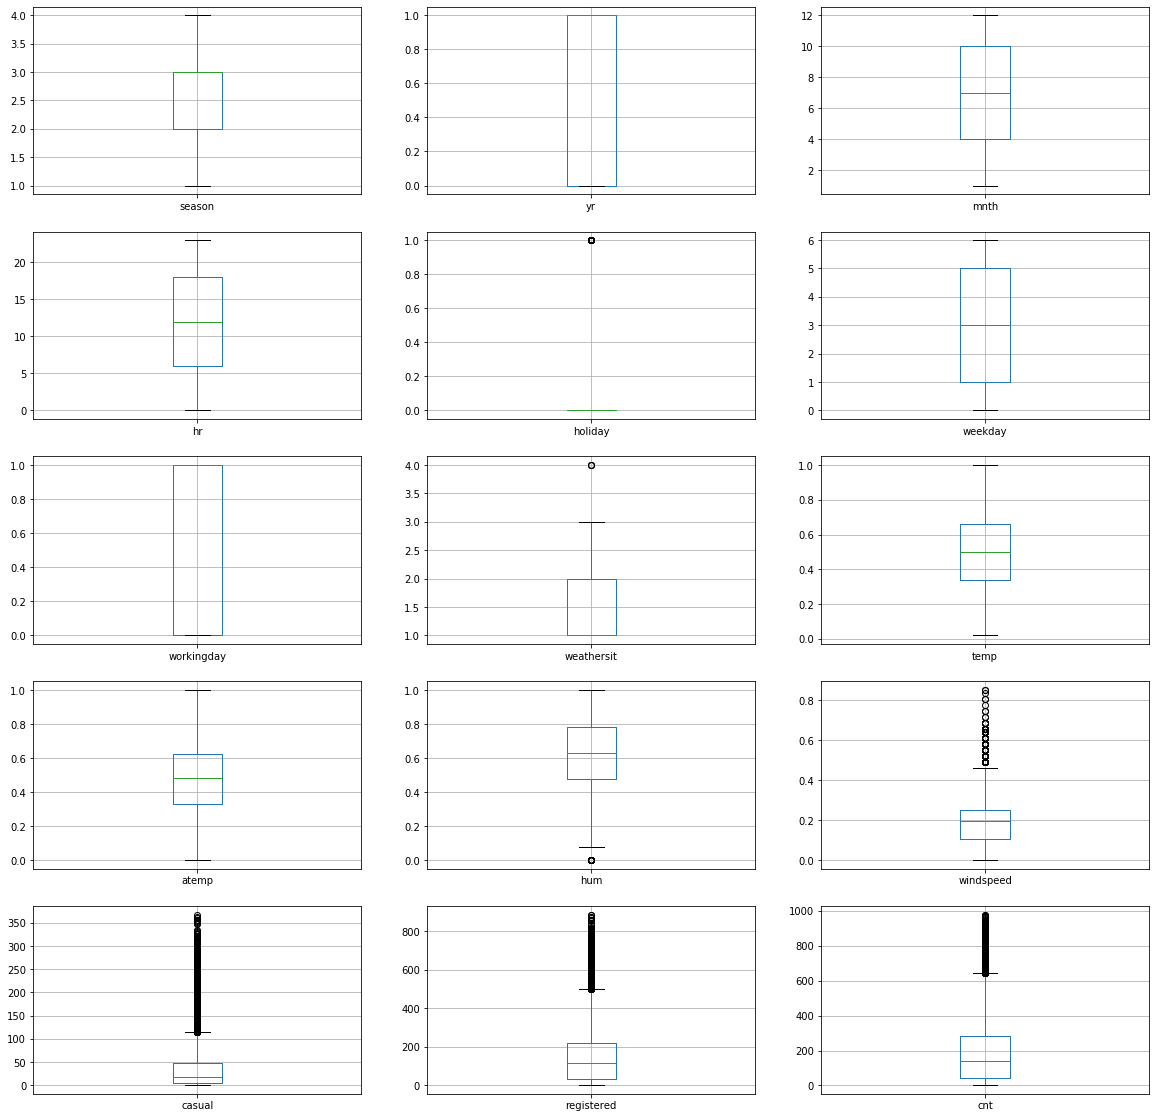

In [14]:
# Plotting the boxplot in order to check and visualize outliers
df.plot(kind='box', subplots=True, layout=(5,3),figsize=(20,20),grid=True,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001863B16A948>,
      dtype=object)

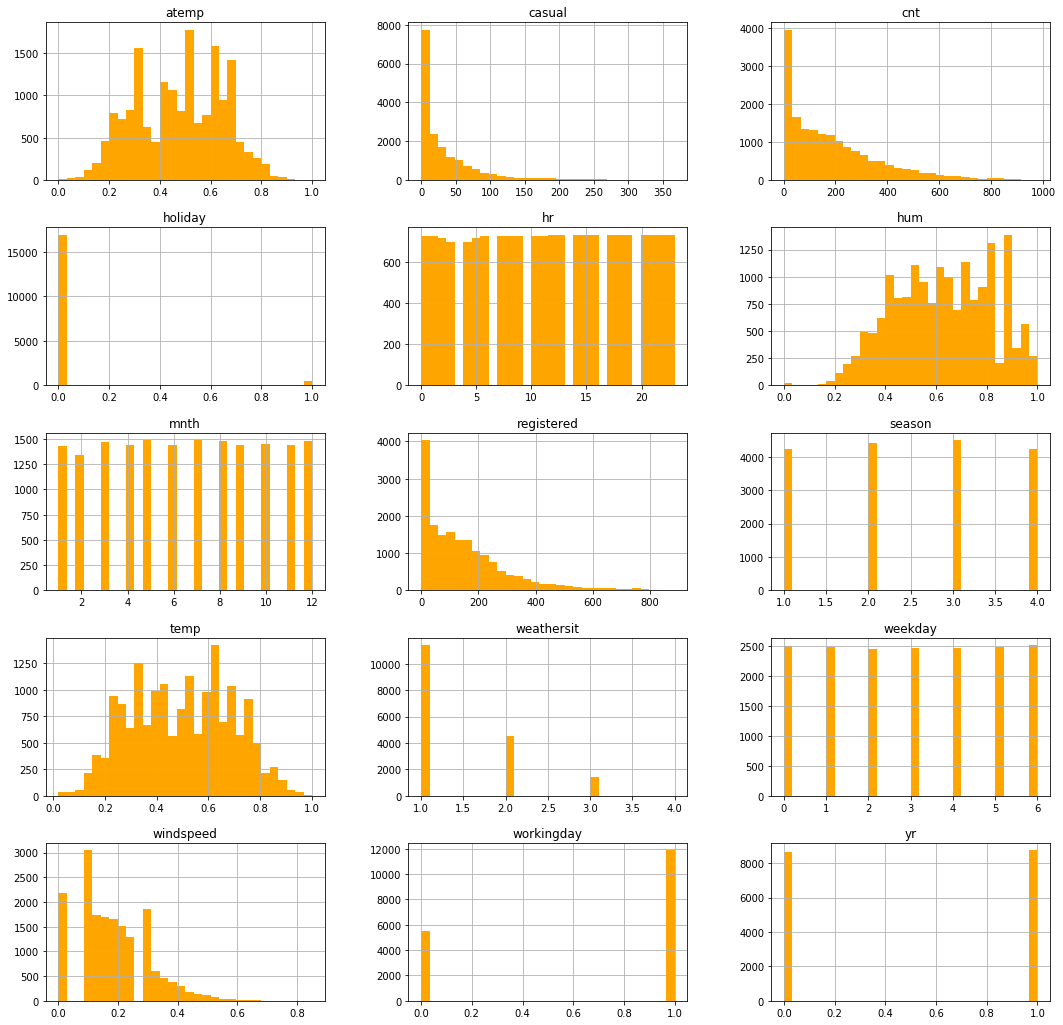

In [15]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(5,3),bins=30,color='orange')

### Bivarient  Analysis

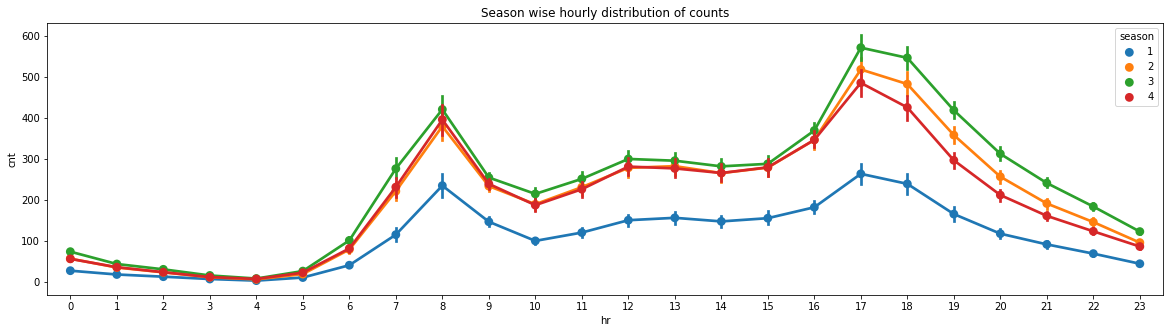

In [16]:
plt.figure(figsize=(20,5))
sns.pointplot(x="hr",y="cnt",hue="season",data=df)
plt.title("Season wise hourly distribution of counts")
plt.show()
#this is how the bikes count changes hourly and along with season


Above plot shows that most users of the bike rental service used a service  at 8 am and one at 5 pm

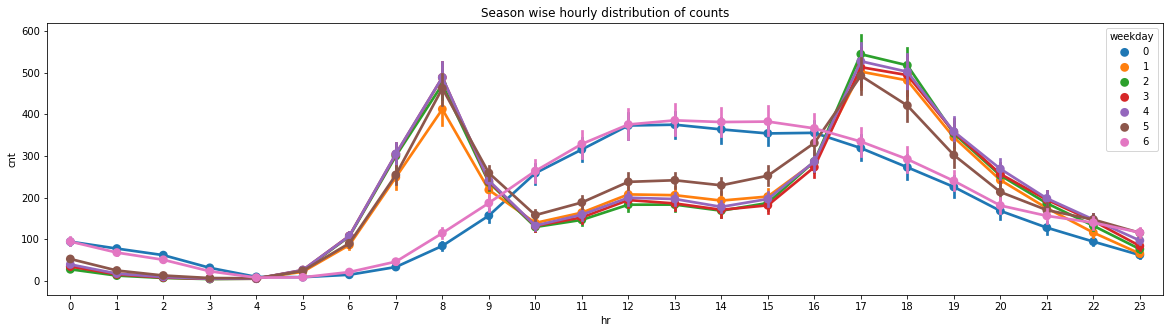

In [17]:
plt.figure(figsize=(20,5))
sns.pointplot(x="hr",y="cnt",hue="weekday",data=df)
plt.title("Season wise hourly distribution of counts")
plt.show()
#this is how the bikes count changes hourly along with weekdays


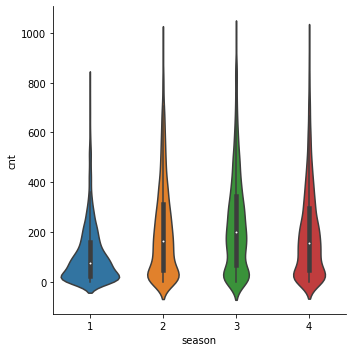

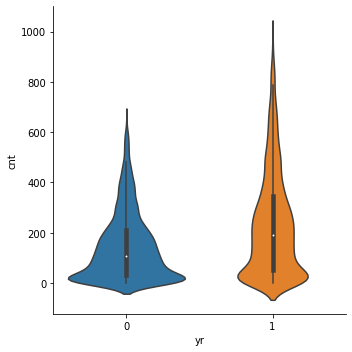

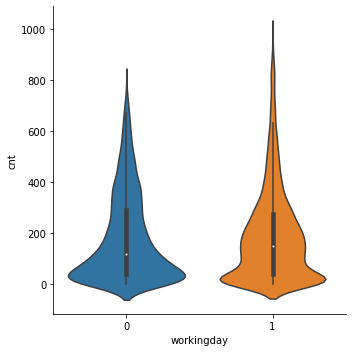

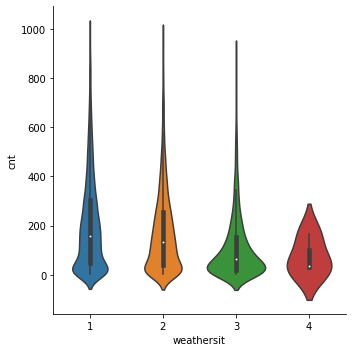

In [18]:
'''lets check the average count based on season, year,working day and weather situation wise
 ==> season (1:winter, 2:spring, 3:summer, 4:fall)
 ==> year (0: 2011, 1:2012)
 ==>month ( 1 to 12)
 ==>hour (0 to 23)
 ==>holiday : weather day is holiday or not
 ==>workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
 ==> weathersit :
  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''
m=df.drop(['dteday','temp','atemp','hum','windspeed','casual','registered','cnt','mnth','hr','holiday','weekday'],axis=1).columns.values
for i in m:
    sns.catplot(x=i, y="cnt", data=df,kind="violin");
    plt.tight_layout()


1)During winter average count is least and more in summer
2)There considerabe increase in 2012 from 2011 that means people are adopting to bike rental systems in 2012
3)The working day plots indicate that more bicycles are rent during normal working days than on weekends or holidays. 
4)Weathersit plot indicates during Clear, Few clouds, Partly cloudy, Partly cloudy weather more bicycles are rented

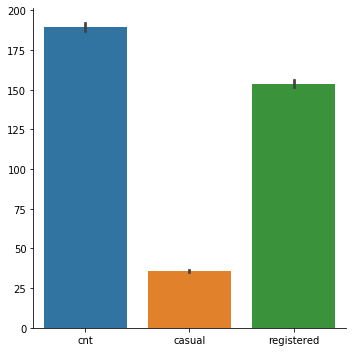

In [19]:
#check highest count for registered & casual
sns.catplot(data=df[['cnt',
                          'casual',
                          'registered']],kind="bar")

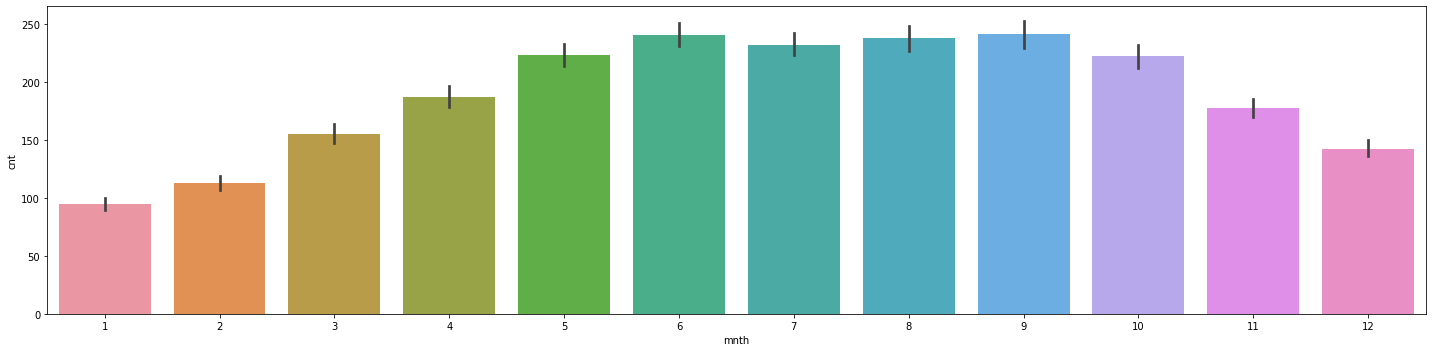

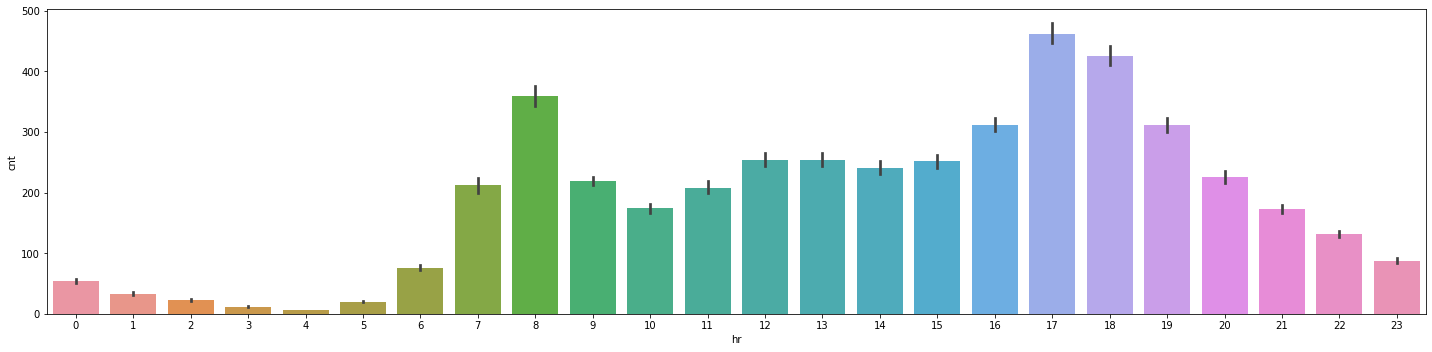

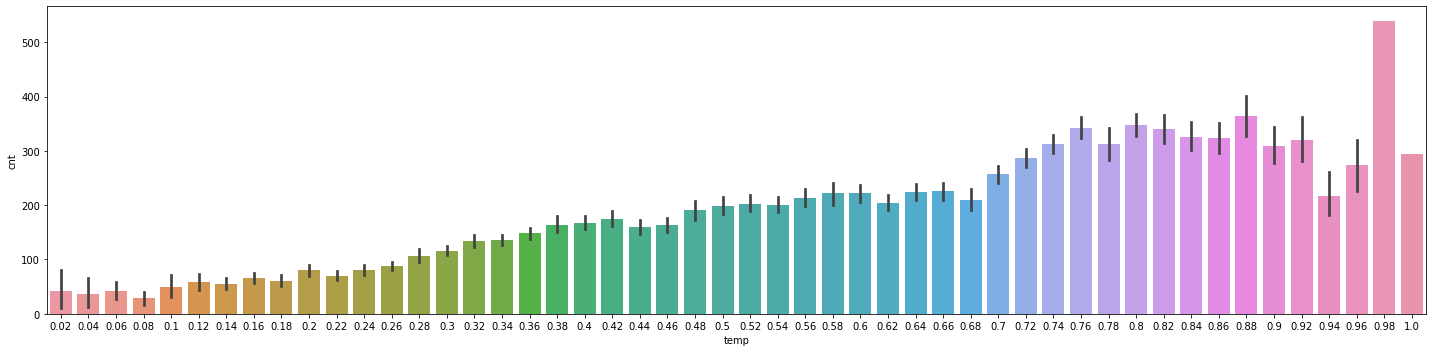

In [20]:
#lets check in which hour of the day average count is more
#lets check count vs temperature
#lets check in which month the year average count is more

m=df.drop(['dteday', 'season', 'yr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],axis=1).columns.values
for i in m:
    plt.figure(figsize=(20,5))
    sns.barplot(x=i,y="cnt",data=df);
    plt.tight_layout()


1)In month of june the average of rental bikes are more count is more
2)Above plot shows that at 5pm the day average count is more
3)Important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data

(15.0, 0.0)

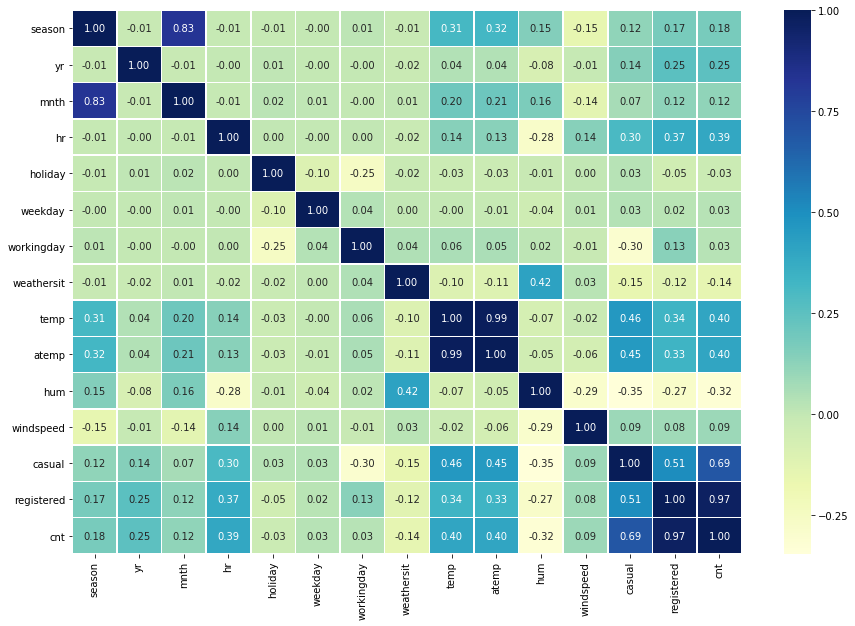

In [21]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [22]:
# converting object data type DOB to datetime64.
df['dteday']= pd.to_datetime(df['dteday'])

In [23]:
#check date when highest no of bikes on rental 
df2=df.sort_values(by=["cnt"], ascending=False)
df2.cnt.head(20)


14773    977
14964    976
14748    970
14725    968
15084    967
15780    963
10622    957
15108    953
15444    948
15588    943
14293    941
15756    938
14772    925
15732    922
15276    917
13596    913
15132    905
15300    901
15324    900
14965    900
Name: cnt, dtype: int64

In [24]:
df2.loc[df2["cnt"]==977]

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


### The highest total no of bikes which is 977 was rental on 2012-09-12.

In [25]:
# Now we've enriched our DataFrame with date time features, we can remove 'dteday'
df.drop(['dteday'],axis=1,inplace=True)

In [26]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [27]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [28]:
#lets again check the skewness
df.skew()
#skewness still due to outliers

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    0.996837
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.263926
casual       -0.230087
registered   -0.819644
cnt          -0.818180
dtype: float64

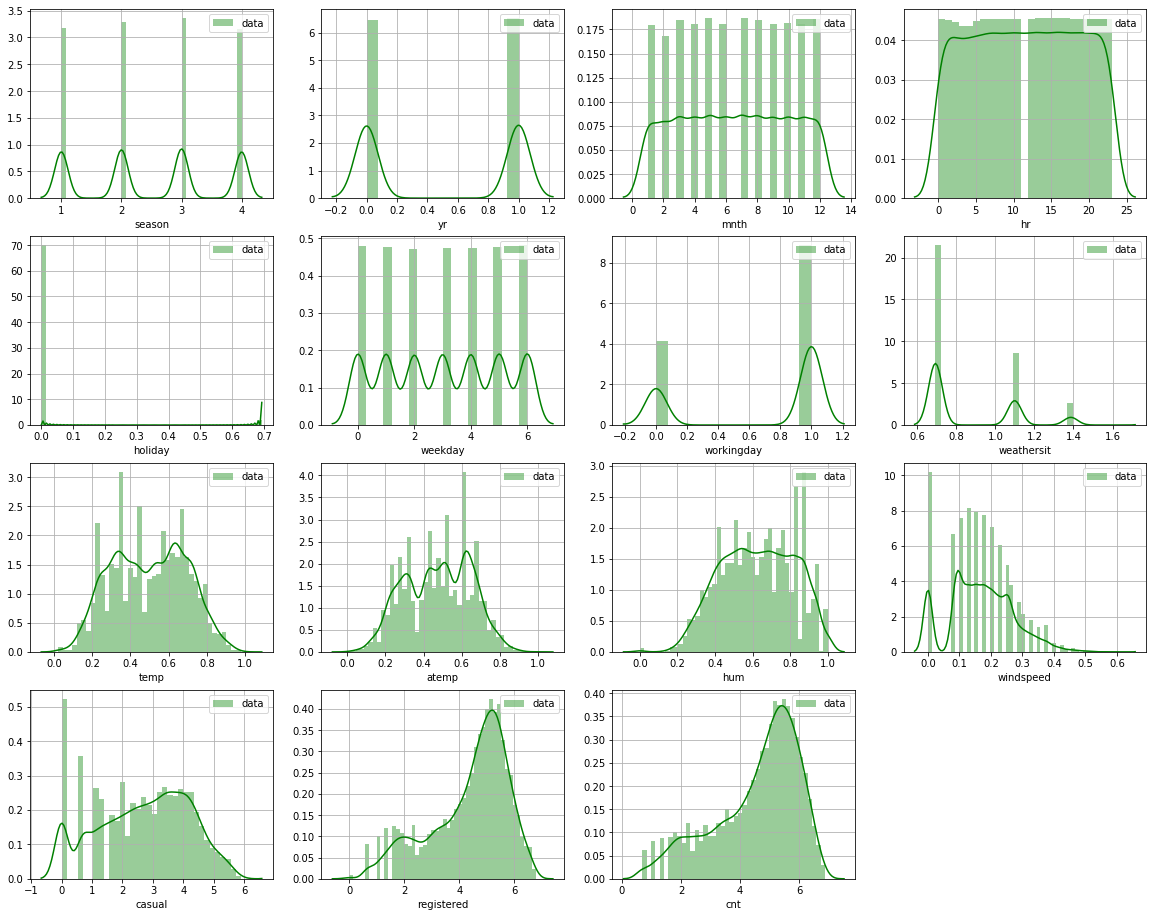

In [29]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [30]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_bike=df.loc[(z<3).all(axis=1)]
print(df_bike.shape)

(17379, 15)
(16768, 15)


In [31]:
#lets again check the skewness after removing outliers
df_bike.skew()

season       -0.013785
yr           -0.012406
mnth         -0.008893
hr           -0.009207
holiday       0.000000
weekday      -0.036761
workingday   -0.887386
weathersit    0.996223
temp         -0.020046
atemp        -0.103922
hum          -0.084211
windspeed     0.171060
casual       -0.238426
registered   -0.816488
cnt          -0.824885
dtype: float64

# Modeling


In [32]:
# Split data into X and y
X = df_bike.drop("cnt", axis=1)

y = df_bike["cnt"]

In [33]:
# Independent variables (no target column)
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0.0,6,0,0.693147,0.24,0.2879,0.81,0.0,1.386294,2.639057
1,1,0,1,1,0.0,6,0,0.693147,0.22,0.2727,0.80,0.0,2.197225,3.496508
2,1,0,1,2,0.0,6,0,0.693147,0.22,0.2727,0.80,0.0,1.791759,3.332205
3,1,0,1,3,0.0,6,0,0.693147,0.24,0.2879,0.75,0.0,1.386294,2.397895
4,1,0,1,4,0.0,6,0,0.693147,0.24,0.2879,0.75,0.0,0.000000,0.693147


In [34]:
# Target variable
y


0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
17374    4.787492
17375    4.499810
17376    4.510860
17377    4.127134
17378    3.912023
Name: cnt, Length: 16768, dtype: float64

In [35]:
#checking shape of input variable
X.shape

(16768, 14)

In [36]:
#checking shape of target variable
y.shape

(16768,)

In [37]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-1.369964,-1.006222,-1.620676,-1.669466,0.0,1.473556,-1.537649,-0.688347,-1.346338,-1.106524,0.944877,-1.690802,-0.888529,-1.262273
1,-1.369964,-1.006222,-1.620676,-1.524857,0.0,1.473556,-1.537649,-0.688347,-1.450521,-1.195354,0.892728,-1.690802,-0.343156,-0.645828
2,-1.369964,-1.006222,-1.620676,-1.380247,0.0,1.473556,-1.537649,-0.688347,-1.450521,-1.195354,0.892728,-1.690802,-0.615843,-0.763950
3,-1.369964,-1.006222,-1.620676,-1.235638,0.0,1.473556,-1.537649,-0.688347,-1.346338,-1.106524,0.631980,-1.690802,-0.888529,-1.435651
4,-1.369964,-1.006222,-1.620676,-1.091029,0.0,1.473556,-1.537649,-0.688347,-1.346338,-1.106524,0.631980,-1.690802,-1.820851,-2.661242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,-1.369964,0.993817,1.596051,1.078110,0.0,-1.013719,0.650343,1.030720,-1.242154,-1.283599,-0.150263,-0.156193,-0.149682,0.213176
16764,-1.369964,0.993817,1.596051,1.222719,0.0,-1.013719,0.650343,1.030720,-1.242154,-1.283599,-0.150263,-0.156193,-0.343156,0.008548
16765,-1.369964,0.993817,1.596051,1.367328,0.0,-1.013719,0.650343,-0.688347,-1.242154,-1.283599,-0.150263,-0.156193,-0.422368,0.025873
16766,-1.369964,0.993817,1.596051,1.511938,0.0,-1.013719,0.650343,-0.688347,-1.242154,-1.195354,-0.358861,-0.418819,-0.046011,-0.361627


In [38]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [39]:
models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.30)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [40]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 70 is: 0.9478153875978742
max r2 score corresponding to 81 is: 0.9981464173066319
max r2 score corresponding to 92 is: 0.9972419073080293
max r2 score corresponding to 59 is: 0.9998363749397233
max r2 score corresponding to 55 is: 0.9246546472169312
max r2 score corresponding to 59 is: 0.9997098464119023
max r2 score corresponding to 54 is: 0.4978321674651648
max r2 score corresponding to 92 is: 0.9972414111155812
max r2 score corresponding to 54 is: 0.7232041575539128


{'KNeighborsRegressor': 0.9526070982519617,
 'SVR': 0.9983499569699081,
 'LR': 0.9967492755992416,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.9221644692329786,
 'GradientBoostingClassifier': 0.9996795012079441,
 'Lasso': 0.4977983344576194,
 'Ridge': 0.9967492607224471,
 'ElasticNet': 0.7227456743217413}

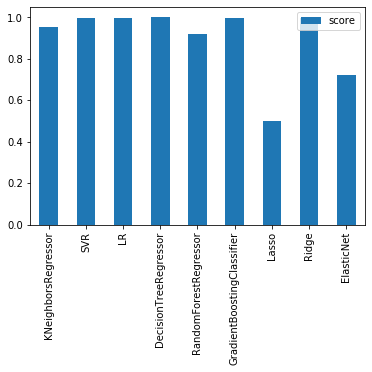

In [41]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [42]:
#           Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 58 is: 0.9558143077059527
R2 Score :  0.9558143077059527


Cross_val_score= 0.9296723258520408


Mean absolute error= 0.22837523277354563


Mean squared error= 0.09007108048783692


Root Mean squared error= 0.30011844409805427


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 81 is: 0.9981464173066319
R2 Score :  0.9981464173066319


Cross_val_score= 0.9916268990848666


Mean absolute error= 0.04819879048954741


Mean squared error= 0.003715540007697135


Root Mean squared error= 0.0609552295352674


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 92 is: 0.9972419073

In [43]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,95.581431,92.967233,22.837523,9.007108,30.011844
1,SVR,99.814642,99.162690,4.819879,0.371554,6.095523
2,LinearRegression,99.724191,99.643121,5.198224,0.555092,7.450451
3,DecisionTreeRegressor,99.982929,99.969456,1.038078,0.034182,1.848835
4,RandomForestRegressor,99.994794,99.984830,0.621739,0.010425,1.021027
5,GradientBoostingRegressor,99.970970,99.957621,1.788586,0.058885,2.426627
6,AdaBoostRegressor,98.690221,98.350932,13.174751,2.645561,16.265182
7,Lasso,49.783217,42.469116,80.262649,97.121636,98.550310
8,Ridge,99.724141,99.643101,5.198534,0.555192,7.451122
9,ElasticNet,72.320416,68.617950,58.814958,53.533626,73.166677


In [44]:
#lets use GridsearchCV to find out best parameters for RandomForestRegressor
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_


{'n_estimators': 500}

# After all this process conclusion is that RandomForest is performing well.


In [45]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3,random_state=82)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
y_preds = rf.predict(x_test)
# Evaluate the classifier
# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")


Regression model metrics on the test set:
R^2: 1.00
MAE: 0.00
MSE: 0.00


In [46]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
15622,1.791759,1.791759
13393,5.365976,5.362920
10300,2.564949,2.564949
9163,4.691348,4.689709
9566,4.844187,4.845067
...,...,...
12749,5.123964,5.131958
2233,4.406719,4.399684
8131,5.468060,5.469413
3394,6.194405,6.191732


In [47]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_preds)
df1.to_csv('Project_4_Bike_Sharing_submission.csv')

In [48]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(rf,'Project_4_Bike_Sharing.pkl')

['Project_4_Bike_Sharing.pkl']

In [49]:
#lets read the model using joblib
final=joblib.load('Project_4_Bike_Sharing.pkl')
final.predict(x_test)

array([1.79175947, 5.36291962, 2.56494936, ..., 5.46941274, 6.19173229,
       6.40542989])

Conclusion:
1) In third season(i.e Summer season) no. of bikes hired are more than any other season, and in Season 1(winter) bikes hired are much less. 
2) In 2012 no. of rented bikes are way more than in 2011.(looks like this scheme is getting popular).
3) In the Month June, August and September bike sharing process is on the peek.
4) So, we see that during peak hours(8 a.m) and (5 to 6 p.m) no. of bikes shared are high than the rest of the day.
5) Also, at 7 a.m, (9 a.m to 4 p.m) and ( 7 p.m to 8 p.m) Bikes rented are also more but less than the counts at peak hours.
6) During holidays people prefer less bike sharing. 
7) During weekdays on an average people use bike sharing too much, and during weekends the no. is little bit low(Not a massive difference).
8) People prefer bike rides when the weather is: Clear, Few clouds, Partly cloudy, Partly cloudy.
9) People try to avoid except in emergency whenthe weather is: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
10)Another important factor seems to be the temperature: higher temperatures lead to an increasing number of bike rents and lower temperatures not only decrease the average number of rents but also shows more outliers in the data
11)The highest total no of bikes which is 977 was rental on 2012-09-12.